# Lecture 6

(Summer 2022)

## Outline of Topics

 - Mapping
 - Dictionaries
 
For more detail on python please see the Purdue DataMine web link: <a href="https://thedatamine.github.io/the-examples-book/python.html" target="_blank">Data Mine on Python</a>

Also see: <a href="https://docs.python.org/3/" target="_blank">Python 3.9.1 Documentation</a>

In [1]:
# Bring in the packages we have used before.

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests

# Simple Mapping?

I found a file containing cities and towns and information about them such as:

* Their latitude and longitude
* The county and the state
* The so-called FIPS (which is related to the number associated with counties in the USDA database)

In [2]:
csv_file_name = 'cities-and-towns-of-the-united-states.csv'
my_file_name = 'Data/' + csv_file_name
my_new_file_name = 'Data/' + 'Wrangled-' + csv_file_name

# Open the file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line

print(line)
fields = line.split(';')
print(len(fields))
print(fields)
print()

for i in range(20):
    line = fin.readline()
    fields = line.split(';')
    print(len(fields))
    print(fields)
    print()

fin.close()

Geo Point;Geo Shape;GNIS ID;ANSICODE;FEATURE;FEATURE2;NAME;POP 2010;COUNTY;COUNTY FIPS;STATE;STATE FIPS;LATITUDE;LONGITUDE;PopPlLat;PopPlLong;ELEV IN M;ELEV IN FT

18
['Geo Point', 'Geo Shape', 'GNIS ID', 'ANSICODE', 'FEATURE', 'FEATURE2', 'NAME', 'POP 2010', 'COUNTY', 'COUNTY FIPS', 'STATE', 'STATE FIPS', 'LATITUDE', 'LONGITUDE', 'PopPlLat', 'PopPlLong', 'ELEV IN M', 'ELEV IN FT\n']

18
['44.2998540717,-120.834480347', '"{""type"": ""Point"", ""coordinates"": [-120.83448034701922, 44.299854071684514]}"', '1154317', '2411494', 'Civil', 'County Seat', 'Prineville', '9253', 'Crook', '013', 'OR', '41', '44.2998485', '-120.8344664', '44.2998485', '-120.8344664', '878', '2881\n']

18
['41.7354923486,-111.834399861', '"{""type"": ""Point"", ""coordinates"": [-111.83439986101921, 41.73549234864257]}"', '1442849', '2410856', 'Civil', 'County Seat', 'Logan', '48174', 'Cache', '005', 'UT', '49', '41.7354862', '-111.834388', '41.7354862', '-111.834388', '1382', '4534\n']

18
['39.3688793269,-107.

## Decoding the data ...

Notice how the separater in this file is `;` rather than a comma. Also notice the complexity of the data and the seming redundancy. There are 18 header items:

0. Geo Point: is a lat, lon pair, e.g., 44.2998540717,-120.834480347
1. Geo Shape: is a Json-like object, e.g., "{""type"": ""Point"", ""coordinates"": [-120.83448034701922, 44.299854071684514]}"
2. GNIS ID: is an integer, e.g., 1154317
3. ANSICODE: is an integer, e.g., 2411494
4. FEATURE: is a text descriptor, e.g., Civil
5. FEATURE2: is a text descriptor, e.g., County Seat
6. NAME: seems to be the name of the Feature, e.g., Prineville (the name of a city apparently)
7. POP 2010: probably the population of the entity in 2010, e.g., 9253
8. COUNTY: name, e.g., Crook
9. COUNTY FIPS: a 3 digit integer uniquely identifying the county in the state, e.g., 013
10. STATE: name abbreviation, e.g., OR
11. STATE FIPS: a 2 digit code identifying the state, e.g., 41
12. LATITUDE: similar number, e.g., 44.2998485, but with less precision
13. LONGITUDE: similar number, e.g., -120.8344664, but with less precision
14. PopPlLat: seems are repetition of the above number, e.g., 44.2998485
15. PopPlLong: seems a repetition of the above number, e.g., -120.8344664
16. ELEV IN M: 878
17. ELEV IN FT: 2881

To better understand some of these, it would be helpful to see the range of values that are present in the data. Of course, this can be easily done with excel.

## In the next cell I pull out the information of interest ...

Essentially what I need to create a "location" for each state-county pair. Then I might be able to create maps colored by data from the USDA web page.


In [3]:
fin = open(my_file_name, "r")

# This creates the file and, if aleady exists, erases any 
# old content
fout = open(my_new_file_name, "w")
fout.close() 

# Read the first line containing header and split the line 
# string into fields on the semi-colon separator. This returns a 
# list where each list element is one of comma delimited 
# strings. For the .csv files here there will be 18 
# substrings in each line. They are numbered from 0 to 17. 
# We want to retain numbers
# 4 ('FEATURE'), 5 ('FEATURE2'), 6 ('NAME'), 7('POP 2010'), 
# 8 ('COUNTY'), 9 ('COUNTY FIPS'), 10 ('STATE'), 11 ('STATE FIPS'), 
# 12 ('LATITUDE'), 13('LONGITUDE')
#
# The code below creates the header for the new csv file

line = fin.readline()
fin.close()

fields = line.split(';')
newline = fields[4] + ',' + fields[5] + ',' + fields[6] + ','
newline = newline + fields[7] + ',' + fields[8] + ',' + fields[9] + ','
newline = newline + fields[10] + ',' +fields[11] + ','
newline = newline + fields[12] + ',' +fields[13]

fout = open(my_new_file_name, "a")
print(newline, file=fout)
fout.close() 

# Now I want to go through the input csv line by line deleting 
# the superfluous fields and appending the new lines to the 
# "wrangled" file.

fin = open(my_file_name, "r")
fin.readline() # Read the header line and move to 2nd line

# Define some sets so that we can record the unique values that certain
# fields take ...

f = set()
f2 = set()
state = set()

fout = open(my_new_file_name, "a")

for line in fin:
    fields = line.split(';')
    newline = fields[4] + ',' + fields[5] + ',' + fields[6] + ','
    newline = newline + fields[7] + ',' + fields[8] + ',' + fields[9] + ','
    newline = newline + fields[10] + ',' +fields[11] + ','
    newline = newline + fields[12] + ',' +fields[13]    
    print(newline, file=fout)
    f.add(fields[4])
    f2.add(fields[5])
    state.add(fields[10])

fin.close()
fout.close()

In [4]:
print(f'The values taken by the Feature field are: {f}\n')
print(f'The values taken by the Feature2 field are: {f2}\n')
print(f'The values taken by the State field are:\n {state}')

The values taken by the Feature field are: {'Locale', 'Census', 'Place', 'Populated Place', 'Civil'}

The values taken by the Feature2 field are: {'State Capital County Seat', '-999', 'State Capital', 'National Capital', 'County Seat'}

The values taken by the State field are:
 {'DE', 'NE', 'AR', 'KY', 'VT', 'NH', 'PA', 'NV', 'MI', 'ID', 'VI', 'NC', 'CT', 'TN', 'OH', 'IN', 'AZ', 'WV', 'SD', 'OR', 'WI', 'AK', 'VA', 'ME', 'RI', 'ND', 'CA', 'TX', 'AL', 'IL', 'WY', 'WA', 'NM', 'LA', 'FL', 'KS', 'MA', 'MS', 'MO', 'NJ', 'CO', 'IA', 'MT', 'GA', 'OK', 'NY', 'SC', 'MN', 'HI', 'DC', 'MD', 'UT', 'PR'}


In [5]:
fin = open(my_new_file_name, "r")
fin.readline() # Read the header line and move to 2nd line
k = 0

for line in fin:
    fields = line.split(',')
    T1 = fields[1] == 'State Capital County Seat'
    T2 = fields[1] == 'County Seat'
    if T1 or T2:
        k = k + 1
        
fin.close()

fin = open(my_new_file_name, "r")
fin.readline() # Read the header line and move to 2nd line
        
x = np.zeros(k)
y = np.zeros(k)

l = 0
for line in fin:
    fields = line.split(',')
    T1 = fields[1] == 'State Capital County Seat'
    T2 = fields[1] == 'County Seat'
    if T1 or T2:
        x[l] = float(fields[9])
        y[l] = float(fields[8])
        l = l + 1

fin.close()


In [6]:
print(len(x))
print(x)
print(len(y))
print(y)


3117
[-120.8344664  -111.834388   -105.0166498  ... -103.5993477   -95.31316132
  -72.4475994 ]
3117
[44.2998485 41.7354862 39.613321  ... 31.7051291 36.3008558 43.989788 ]


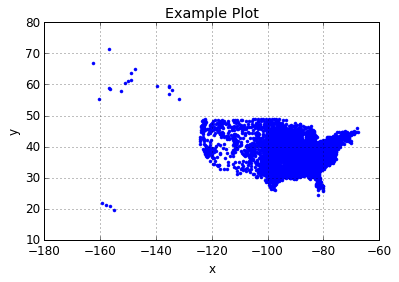

In [7]:
fig = plt.figure()
plt.style.use('classic')
plt.plot(x, y, '.')
plt.title("Example Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

## Notice that the FIPS information is available in the USDA-NASS dataset ...

Therefore, if I were able to create a dictionary indexed by state-county pairs or equivalently, FIPS, then we'd have a way to look up lat-lon pairs associated with state-county pairs. We could use either FIPS or state-county pair names as the indices.

For more detail on dictionary methods: <a href="https://www.w3schools.com/python/python_ref_dictionary.asp" target="_blank">W3 - Python Dictionary Methods</a>


### Let's try to make a dictionary where ...

each key is a tuple of the `(state fips, county fips)` and a value is a tuple `(lat, lon)`

Two of the counties where I farm in Colorado are Phillips and Sedgwick Counties. Here is the data from the county seat spreadsheet ...

1. Julesburg is the county seat of Sedgwick County in Colorado. The fips are (8, 115) and the lat and lon are (40.9883258, -102.2643519).

2. Holyoke is the county seat of Phillips County in Colorado. The fips are (8, 95) and the lat and lon are (40.5844369, -102.3024103).



In [8]:
# Here's one way to make the prototype dictionary ...

CountySeatDict = {}
CountySeatDict.update({(8, 115): (40.9883258, -102.2643519)})
print(CountySeatDict)

{(8, 115): (40.9883258, -102.2643519)}


In [9]:
CountySeatDict.update({(8, 95): (40.5844369, -102.3024103)})
print(CountySeatDict)

{(8, 115): (40.9883258, -102.2643519), (8, 95): (40.5844369, -102.3024103)}


## Dictionary summary ...

In a dictionary the values can be anything, but keys must be immutable objects such as integers, strings, or tuples. We have used tuples as the keys in the above CountySeatDict.

There is no particular order of the key:value pairs in a dictionary. Internally, there is an ordering, which is chosen to enable fast lookup of the value associated with a particular key. Thus, a dictionary is meant to be an efficient implementation of the mapping from keys to values. This is precisely what we hope to achieve here - an efficient way to look up the lat, lon for a state-county pair.

Dictionaries are mutable

Operators that work on dictionaries:

1. len()
2. in ... Boolean test of membership, can test if a key is in the dictionary
3. for ... allows iteration through the keys of a dictionary

Important dictionary methods:

1. items() ... iterates through key:value pairs as a list of tuples
2. keys() ... all the keys as a list-like type
3. values() ... all the values as a list-like type

In [10]:
# Try some of these

print(len(CountySeatDict))

print(CountySeatDict.items())
print(CountySeatDict.values())

print(type(CountySeatDict.items()))
print(type(CountySeatDict.values()))

2
dict_items([((8, 115), (40.9883258, -102.2643519)), ((8, 95), (40.5844369, -102.3024103))])
dict_values([(40.9883258, -102.2643519), (40.5844369, -102.3024103)])
<class 'dict_items'>
<class 'dict_values'>


## Types ...

The types of these items are not quite lists. It is similar with the range command. Python calls these **view** objects. Here are some properties:

1. A view object is iterable, i.e., can use them in a `for` loop.
2. Although the order of key:value pairs is not determined, when we iterate with a for loop the relative order of keys and values will always correspond.
3. View objects are dynamic. Once assigned, they will reflect an update made later to the dictionary.

Let's add a few more entries to `CountySeatDict`

In [11]:
CountySeatDict.update({(39, 53): (45.8206794, -120.8217312)})
CountySeatDict.update({(33, 49): (41.6657759, -111.1821409)})
CountySeatDict.update({(40, 27): (35.2265142, -97.46326079)})

In [12]:
for thing in CountySeatDict.items():
    print(thing)

((8, 115), (40.9883258, -102.2643519))
((8, 95), (40.5844369, -102.3024103))
((39, 53), (45.8206794, -120.8217312))
((33, 49), (41.6657759, -111.1821409))
((40, 27), (35.2265142, -97.46326079))


In [13]:
for thing in CountySeatDict.keys():
    print(thing)

(8, 115)
(8, 95)
(39, 53)
(33, 49)
(40, 27)


In [14]:
for thing in CountySeatDict.values():
    print(thing)

(40.9883258, -102.2643519)
(40.5844369, -102.3024103)
(45.8206794, -120.8217312)
(41.6657759, -111.1821409)
(35.2265142, -97.46326079)


In [15]:
# Make a view object and demostrate that it is dynamic

KeyThing = CountySeatDict.keys()
print(KeyThing)

dict_keys([(8, 115), (8, 95), (39, 53), (33, 49), (40, 27)])


In [16]:
# Update the dictionary but don't re-run the command defining KeyThing

CountySeatDict.update({(48, 493): (29.1335781, -98.1561192)})

In [17]:
print(KeyThing)

dict_keys([(8, 115), (8, 95), (39, 53), (33, 49), (40, 27), (48, 493)])


## Creating the dictionary we needed ...

In [18]:
# Just trying to read in the file line by line to create the dictionary above ...

fin = open(my_new_file_name, "r")
fin.readline() # Read the header line and move to 2nd line

CountySeatDict = {}

for line in fin:
    fields = line.split(',')
    if (fields[1] == 'State Capital County Seat') or (fields[1] == 'County Seat'):
        sfips = int(fields[7])
        cfips = int(fields[5])
        fips = (sfips, cfips)
        lat = float(fields[8])
        lon = float(fields[9])
        CountySeatDict.update({fips: (lat, lon)})

fin.close()


In [19]:
# How many do we have ...?

print(len(CountySeatDict))

3089


### Check with google ... ?

<a href="https://www.google.com/" target="_blank">How many counties in the US?</a>

### Check some of the entries with maps.google.com ... 

<a href="https://www.google.com/maps/@40.420723,-86.9123206,15z" target="_blank">Enter some lats and lons.</a>

In [20]:
CountySeatDict.get((8, 115))

(40.9883258, -102.2643519)

In [21]:
CountySeatDict.get((8, 53))

(38.0299967, -107.3153335)

Here is an amusing story about Alfred E. Packer ...

<a href="https://www.washingtonpost.com/archive/politics/1984/04/18/man-who-ate-democrats-is-remembered-with-relish-by-colorados-gop/b6d95625-f702-4c07-9485-ca174698b261/" target="_blank">The man who ate almost all the democrats in Hinsdale County.</a>

# HW: A program to read a text file and create a dictionary ...

There are two text files in the Data subdirectory: JFKMoon.txt and MLKIHaveADream.txt. Here is something to work on ...

1. Using the tools we've seen so far, read the files in line by line and create lists of the individual words in each line. There may be some extra characters, such as newline characters, that you will need to deal with as special cases.

2. Create a program that does character count, word count, and line count on the file you input. There is a unix command that does the same thing, which you could use to compare. Word also has this utility.

3. Now create a dictionary that shows the word frequency for each text file. The keys in the dictionary will be the unique words, the value associated with a key will be number of times a word appears in the text file.

4. How could you modify your program in order to account for the fact that a capitalized word and its uncapitalized version are the same word?

5. Are there other special cases to consider?